In [27]:
# Basic imports
import os
import sys
sys.path.append("..")
from src.config import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preset Variables if needed:
RANDOM_STATE = 1
np.random.seed(RANDOM_STATE)

In [28]:
df_path = os.path.join(CONFIG["paths"]["datasets"], "train_10000_gemaps_ids.feather")
df = pd.read_feather(df_path)
df = df.set_index("dataset_id")
df["gender_m"] = (df["gender"] == "m") * 1
df = df.dropna()
df.head()

,speaker_id,face_id,gender,split,video_id,clip_id,batch,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,...,id_71,id_72,id_73,id_74,id_75,id_76,id_77,id_78,id_79,gender_m
dataset_id,,,,,,,,,,,,,,,,,,,,,
id00012__raOc3-IRsw_00110,id00012,n000012,m,train,_raOc3-IRsw,00110,1,33.945885,0.199680,28.514013,...,0.789295,-0.108900,-0.620182,-0.084505,0.301494,1.104382,-0.394134,-0.479879,-0.538723,1
id00012__raOc3-IRsw_00114,id00012,n000012,m,train,_raOc3-IRsw,00114,1,35.520039,0.186342,30.745964,...,0.401296,-0.350142,-1.209929,0.511581,0.289962,0.769065,-0.184049,-0.432616,-0.281912,1
id00012__raOc3-IRsw_00112,id00012,n000012,m,train,_raOc3-IRsw,00112,1,37.510632,0.200410,30.035391,...,0.297167,-0.444118,-0.704579,0.436096,0.349816,0.794942,-0.259238,-0.737127,-0.664549,1
id00012__raOc3-IRsw_00111,id00012,n000012,m,train,_raOc3-IRsw,00111,1,37.014935,0.244918,28.439920,...,0.443320,-0.081468,-1.005331,0.272788,-0.023903,0.831165,-0.559893,-0.450340,-0.833439,1
id00012__raOc3-IRsw_00113,id00012,n000012,m,train,_raOc3-IRsw,00113,1,37.225666,0.215866,30.978403,...,0.352385,-0.261673,-0.616003,-0.023035,0.317792,0.762406,-0.024848,-0.332184,-0.726211,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, id00012__raOc3-IRsw_00110 to id00080_xKOKZLEReGo_00259
Columns: 176 entries, speaker_id to gender_m
dtypes: float32(88), float64(80), int64(2), object(6)
memory usage: 10.1+ MB


In [30]:
ID_COLUMN_NAMES = [c for c in df.columns if "id_" in c]
info_columns = [
    "speaker_id",
    "face_id",
    "gender",
    "split",
    "video_id",
    "clip_id",
    "batch"
]

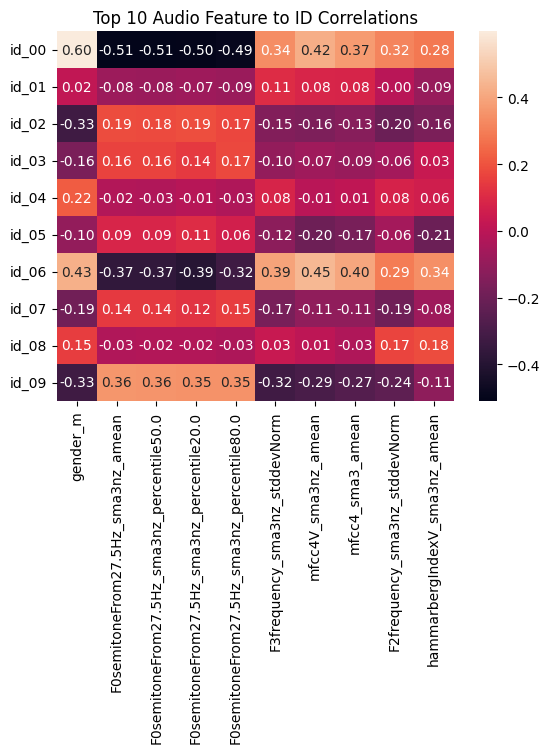

In [31]:
corr = df.drop(columns=info_columns).corr()
corr = corr[ID_COLUMN_NAMES[:10]].T.drop(columns=ID_COLUMN_NAMES)
top_10_corr = list(corr.abs().sum().nlargest(10).index)
corr = corr[top_10_corr]
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Top 10 Audio Feature to ID Correlations")
plt.show()

In [32]:
test_speaker_ids = np.random.choice(df["speaker_id"], size=10)
test_mask = df["speaker_id"].isin(test_speaker_ids)
test_df = df[test_mask]
train_df = df[~test_mask]
test_df, train_df = test_df.drop(columns=info_columns), train_df.drop(columns=info_columns)
len(test_df), len(train_df)

(2951, 7049)

In [33]:
y_column_names = ID_COLUMN_NAMES
y_test, y_train = test_df[y_column_names], train_df[y_column_names]
X_test, X_train = test_df.drop(columns=y_column_names), train_df.drop(columns=y_column_names)

In [34]:
AM_COLUMN_NAME = "id_00"
y_test, y_train = y_test[AM_COLUMN_NAME], y_train[AM_COLUMN_NAME]

In [35]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train = pd.DataFrame(X_scaler.fit_transform(X_train.values), columns=X_train.columns)
X_test = pd.DataFrame(X_scaler.transform(X_test.values), columns=X_test.columns)

#y_scaler = StandardScaler()
#y_train = pd.DataFrame(y_scaler.fit_transform(pd.DataFrame(y_train)), columns=[AM_COLUMN_NAME])
#y_test = pd.DataFrame(y_scaler.transform(pd.DataFrame(y_test)), columns=[AM_COLUMN_NAME])

In [36]:
y_train.describe()

count    7049.000000
mean       -0.916416
std         0.560759
min        -2.889068
25%        -1.304773
50%        -0.902901
75%        -0.505566
max         0.727142
Name: id_00, dtype: float64

In [37]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

class AVG_MODEL:
    def __init__(self):
        self.mean_value = None
    
    def fit(self, X, y):
        self.mean_value = np.mean(y)
        return self
    
    def predict(self, X):
        if self.mean_value is None:
            raise ValueError("Model must be fitted before prediction")
        return np.full(X.shape[0], self.mean_value)

def evaluate_model(m_name: str, m):
    """Evaluate model performance on test data"""
    pred = m.predict(X_test)
    print(f"Evaluation for Model {m_name}:")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred):.4f}")
    print(f"Mean Squared Error : {mean_squared_error(y_test, pred):.4f}")
    print(f"R2 Score           : {r2_score(y_test, pred):.4f}")

In [38]:
avg_model = AVG_MODEL().fit(X_train, y_train)
evaluate_model("AVG_Model", avg_model)

Evaluation for Model AVG_Model:
Mean Absolute Error: 0.3610
Mean Squared Error : 0.1916
R2 Score           : -0.3033


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.01, 0.001]
}

models = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=RANDOM_STATE),
    param_grid=param_grid,
    n_jobs=10,
    scoring="r2",
)
models.fit(X_train, y_train)
model = models.best_estimator_
models.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [40]:
evaluate_model("GradientBoostingRegressor", model)

Evaluation for Model GradientBoostingRegressor:
Mean Absolute Error: 0.3122
Mean Squared Error : 0.1554
R2 Score           : -0.0574


/home/chr1s/.conda/envs/acoustic-to-anthropometric/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_27891/2590252497.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


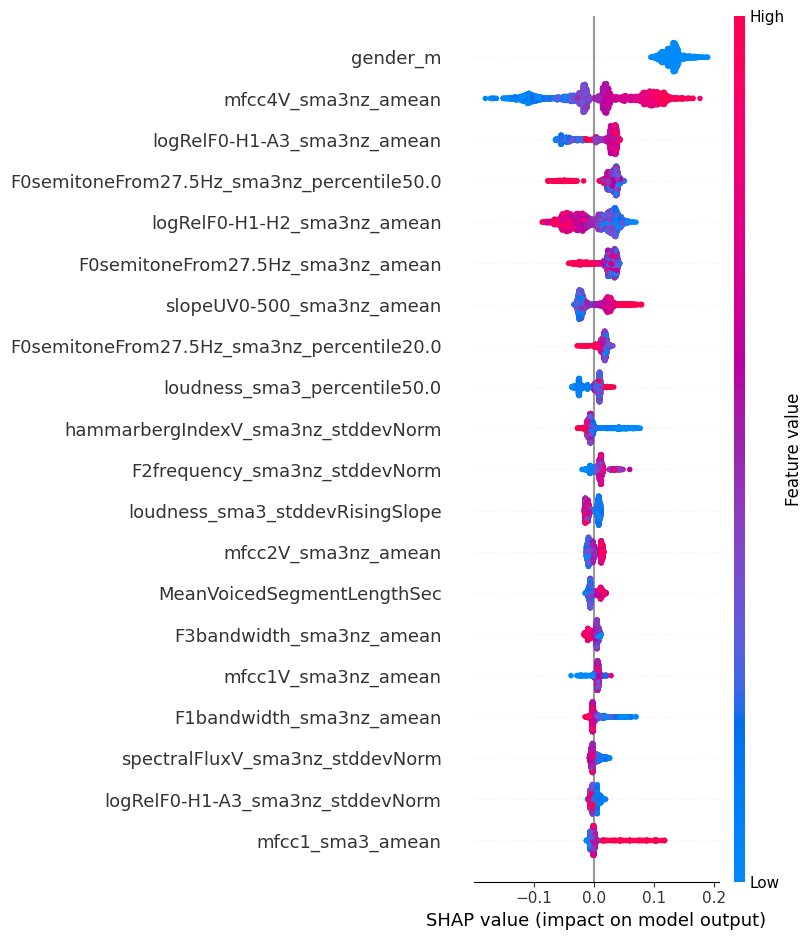

In [41]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

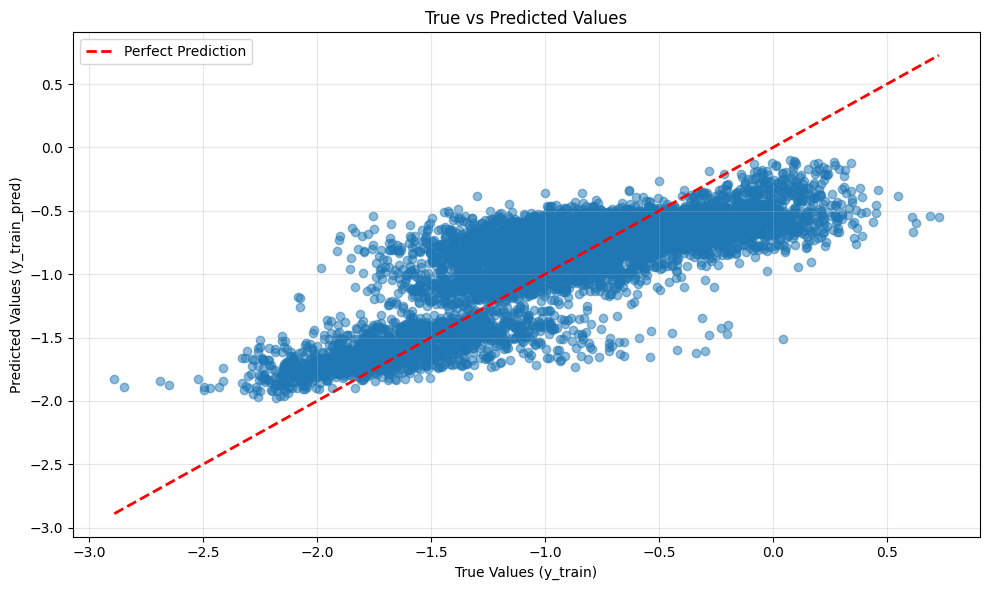

In [ ]:
y_train_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("True Values (y_train)")
plt.ylabel("Predicted Values (y_train_pred)")
plt.title("True vs Predicted Values")

# Add a diagonal line for perfect predictions
min_val = min(y_train.min(), y_train_pred.min())
max_val = max(y_train.max(), y_train_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2, label="Perfect Prediction")

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

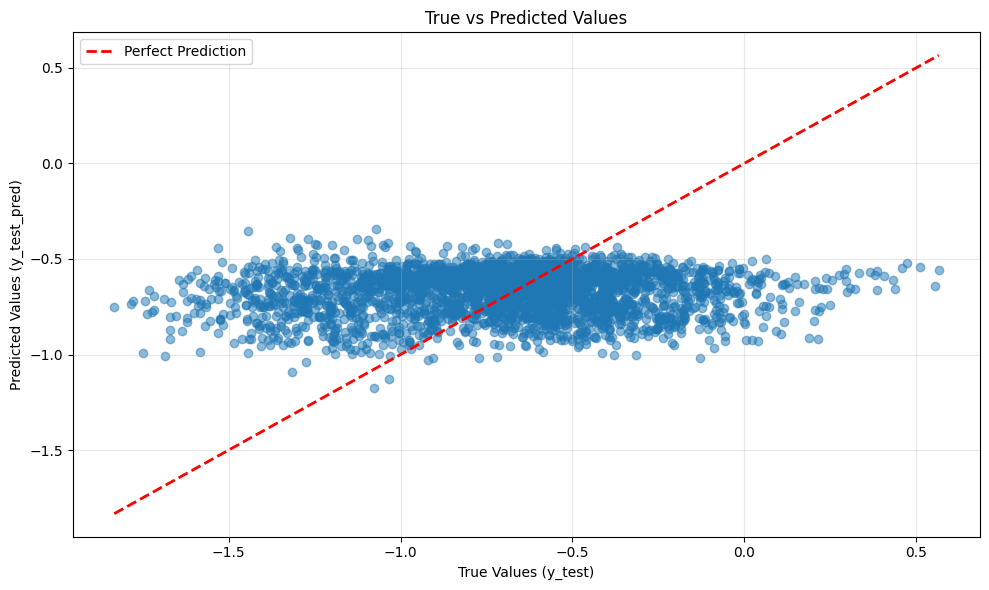

In [ ]:
y_test_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.title("True vs Predicted Values")

# Add a diagonal line for perfect predictions
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2, label="Perfect Prediction")

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [51]:
X_train["gender_m"]

0       0.621916
1       0.621916
2       0.621916
3       0.621916
4       0.621916
          ...   
7044    0.621916
7045    0.621916
7046    0.621916
7047    0.621916
7048    0.621916
Name: gender_m, Length: 7049, dtype: float64